ЦЕЛИ ПРОЭКТА:

1) Научится правильно производить разведывательный анализ данных.

2) Найти влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

ЗАДАЧИ ПРОЭКТА:

1) Провести первичный отсмотр данных

2) Провести первичный анализ данных

3) Провести корреляционный анализ

4) Провести анализ номинативных переменных

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
def empty_string(column):
    '''Количесво пустых строк в столбце'''
    return stud[column].isnull().sum()

In [3]:
def remove_outlier(column):
    '''Нахождение и удаление выбросов'''
    col = stud[column].dropna()
    if pd.api.types.is_number(col.to_list()[0]):
        perc25 = col.quantile(0.25)
        perc75 = col.quantile(0.75)
        IQR = perc75 - perc25
        stud[column] = stud[column].loc[stud[column].between(
            perc25-1.5*IQR, perc75+1.5*IQR)]
        return True

In [4]:
def create_hist():
    '''
       построение для количественных переменных  гистограмм распределений
    '''
    df = pd.DataFrame()
    for col in stud.columns:
        if pd.api.types.is_number(stud[col].dropna().to_list()[0]):
            df[col] = stud[col]
    df.hist(bins=50, grid=False, alpha=0.5, figsize=(15, 15))
    df = pd.DataFrame

In [5]:
def count_uniq():
    '''
        Количество уникальных значений для номинативных переменных
    '''
    for col in stud.columns:
        if pd.api.types.is_number(stud[col].dropna().to_list()[0]) == False:
            print(col, stud[col].nunique())

In [6]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [7]:
def get_stat_dif(column):
    cols = stud.loc[:, column].dropna().value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                     stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue <= (0.05/len(combinations_all)):
            # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

ПЕРВИЧНЫЙ ОТСМОТР ДАННЫХ

In [8]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [9]:
stud = pd.read_csv(r'B:\SKILL_FACTORY\stud_math.csv')

In [10]:
display(stud.head(30))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [11]:
display(stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [12]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [13]:
print('Количесво пустых строк в каждом столбце')
for col in stud.columns:
    print(col, empty_string(col))

Количесво пустых строк в каждом столбце
school 0
sex 0
age 0
address 17
famsize 27
Pstatus 45
Medu 3
Fedu 24
Mjob 19
Fjob 36
reason 17
guardian 31
traveltime 28
studytime 7
failures 22
schoolsup 9
famsup 39
paid 40
activities 14
nursery 16
studytime, granular 7
higher 20
internet 34
romantic 31
famrel 27
freetime 11
goout 8
health 15
absences 12
score 6


В нащем датасете 13 числовых столбцов и 17 строковых столбцов

ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ

In [14]:
count = 0
for col in stud.columns:
    if remove_outlier(col):
        count += 1
else:
    print(f'Выбросы были убраны в {count} количественных столбцах')

Выбросы были убраны в 13 количественных столбцах


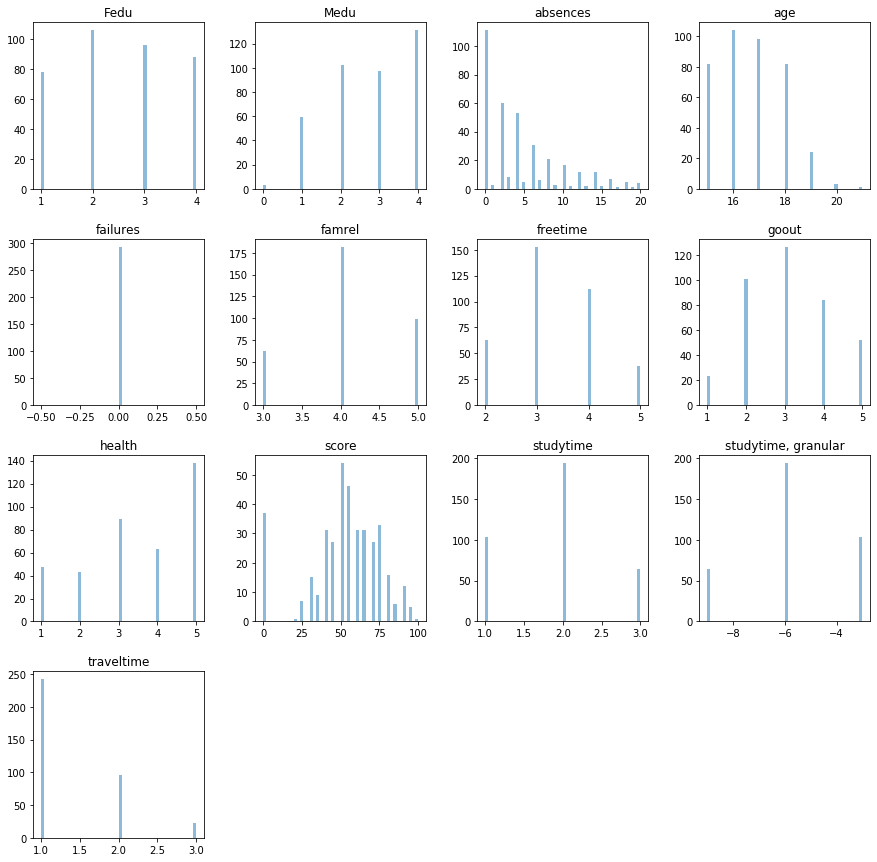

In [15]:
create_hist()

Исходя из гистограмм распределения числовых переменных, среднем все они распределены нормально.
Исходя из гистограмм можно сделать выводы:

1) В среднем матери образованнее отцов. (Fedu, Medu)

2) В среднем количесво пропущенных занятий очень мало. (absences)

3) Возраст учащихся преимущественно состоит из 15 - 18 лет. (age)

4) Можно скзать, что внеучебные неудачи отсутсвуют. (failures)

5) Семейные отношения, в большинстве случаев, находятся на "хорошем"(4) или "очень хорошем"
   уровне(5), но также присутствует существенная доля не очень хороших отнощений. (famrel)
   
6) У большинства учащихся свободное время после школы находится в пределе от "достаточного"(3) до "очень много"(5), но есть существенная часть, у которых его малое количество. (freetime)

7) Большей части учащихся хватает времени на проведение с друзьями, остальная немалая часть 
   испытывает дефицит времени. (goout)
   
8) Больше, чем половина чувствуют себя нормально, хорошо, либо очень хорошо (3 - 5), остальная часть испытывает с этим
   проблемы. (health)

9) Исходя из балов по математике, в среднем балл варируется от [40 - 75], но и существует часть, которая его не смогла написать. (score)

10) У большей части врем время на учёбу помимо школы в неделю находится в пределе [2 - 5] часов,
    можно также наблюдать, что те у того <2 часов и [5 - 10] часов, 
    количество их примерно равно. (studytime)

11) Очень много людей живут поблихости к школе (<15 минут), но некая доля людей добирается больше, чем 15 минут. (traveltime)


In [16]:
print('Количество уникальных значений для номинативных переменных')
count_uniq()

Количество уникальных значений для номинативных переменных
school 2
sex 2
address 2
famsize 2
Pstatus 2
Mjob 5
Fjob 5
reason 4
guardian 3
schoolsup 2
famsup 2
paid 2
activities 2
nursery 2
higher 2
internet 2
romantic 2


Исходя из количесва уникальных значений номинативных переменных можно выделить, что варианты, которые есть в таблице, покрывают большую часть их возможного разнообразия.

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ

In [17]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.167883,-0.162747,0.115437,0.070557,NaN,-0.070557,0.041816,0.030180,0.119997,-0.047402,0.129016,-0.153518
Medu,-0.167883,1.000000,0.639999,-0.135171,0.091193,NaN,-0.091193,0.060018,0.012817,0.064164,-0.045051,0.065712,0.213349
Fedu,-0.162747,0.639999,1.000000,-0.094873,0.089786,NaN,-0.089786,-0.009928,-0.040852,0.040199,0.008538,-0.020560,0.139615
traveltime,0.115437,-0.135171,-0.094873,1.000000,-0.128818,NaN,0.128818,-0.044674,-0.062865,-0.033557,-0.035184,-0.065529,-0.072792
studytime,0.070557,0.091193,0.089786,-0.128818,1.000000,NaN,-1.000000,0.079992,-0.089910,-0.047142,-0.042698,-0.083024,0.112830
failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"studytime, granular",-0.070557,-0.091193,-0.089786,0.128818,-1.000000,NaN,1.000000,-0.079992,0.089910,0.047142,0.042698,0.083024,-0.112830
famrel,0.041816,0.060018,-0.009928,-0.044674,0.079992,NaN,-0.079992,1.000000,0.107271,0.096541,0.028073,-0.020196,0.057692
freetime,0.030180,0.012817,-0.040852,-0.062865,-0.089910,NaN,0.089910,0.107271,1.000000,0.258559,0.056916,0.092394,0.000582
goout,0.119997,0.064164,0.040199,-0.033557,-0.047142,NaN,0.047142,0.096541,0.258559,1.000000,-0.015608,0.111587,-0.129685


In [18]:
stud.corr()['score'].sort_values(ascending=False)

score                  1.000000
Medu                   0.213349
Fedu                   0.139615
studytime              0.112830
absences               0.081274
famrel                 0.057692
freetime               0.000582
health                -0.070460
traveltime            -0.072792
studytime, granular   -0.112830
goout                 -0.129685
age                   -0.153518
failures                    NaN
Name: score, dtype: float64

Из всех переменных, сильнее всего оказывают влияние на итоговый балл только 6:

[Medu, Fedu, studytime, absences, famrel, freetime]

Это может говорить о том, что больше всего на предсказание балла по математике могут влиять как:

оба родителя (Medu, Fedu)

время на учёбу помимо школы (studytime)

количество пропущенных занятий (absences)

семейные отношения (famrel)

свободное время после школы (freetime )

Но из-за их слабой скоррелированности можно также сказать, что балл может быть завышенным.

ОТБОР НЕ КОРРЕЛИРУЮЩИХ ПЕРЕМЕННЫХ.

In [19]:
stud.corr()['score'][stud.corr()['score'].isnull()]

failures   NaN
Name: score, dtype: float64

АНАЛИЗ НОМИНАТИВНЫХ ПЕРЕМЕННЫХ

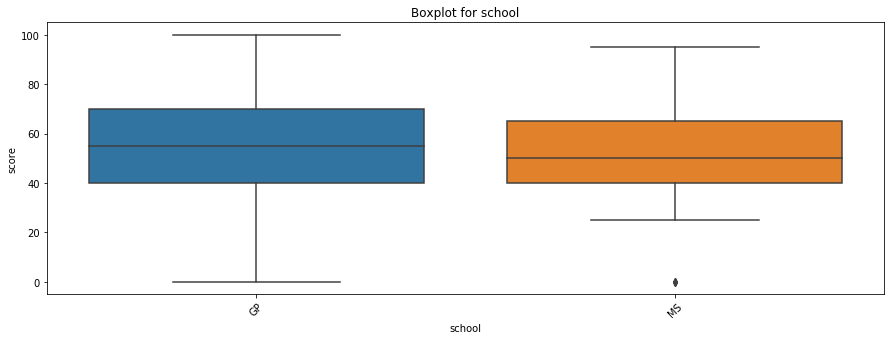

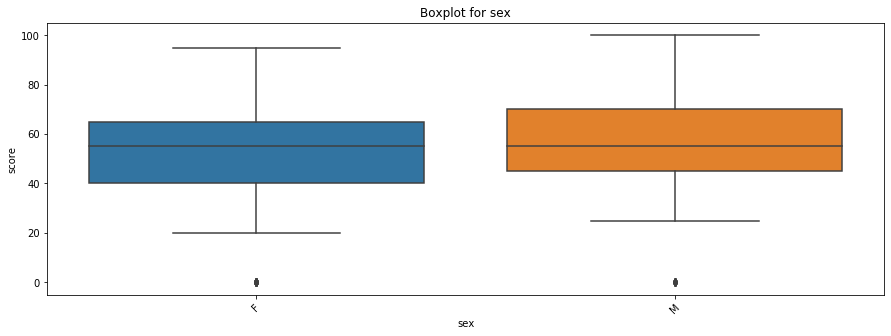

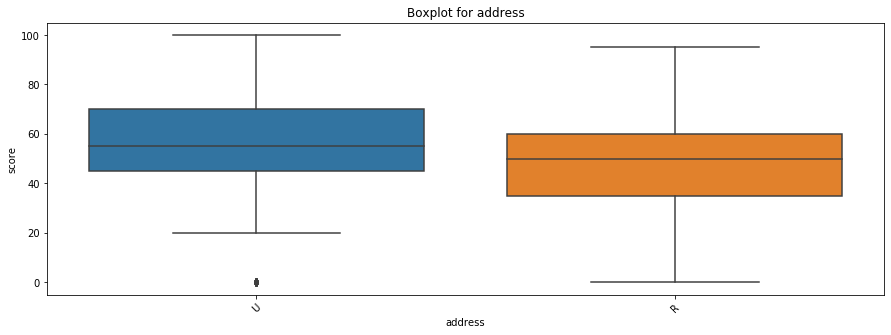

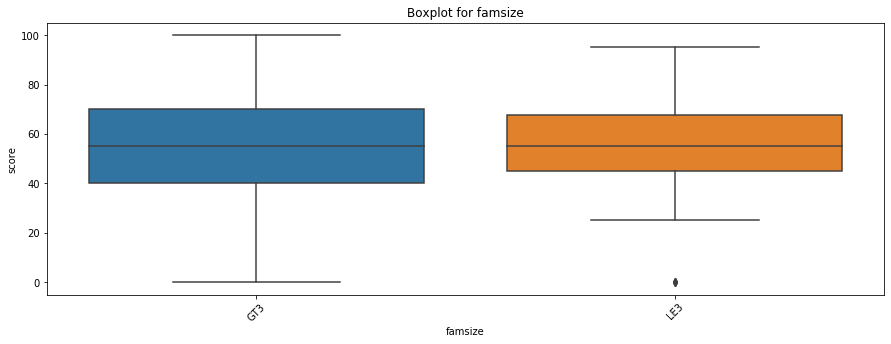

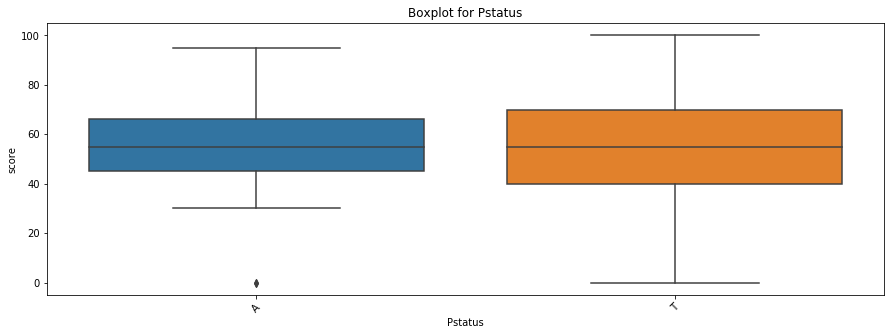

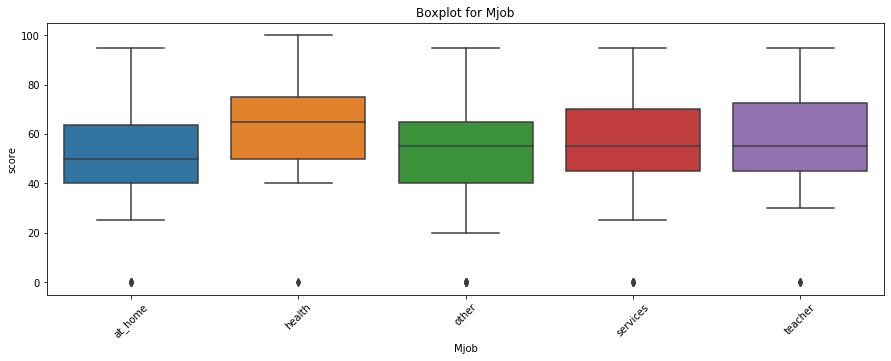

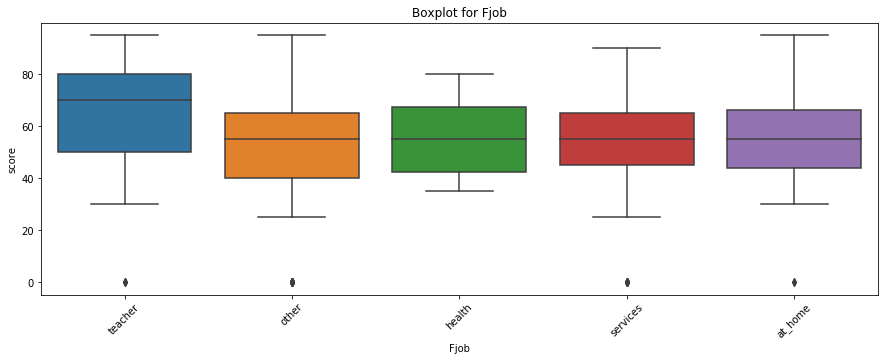

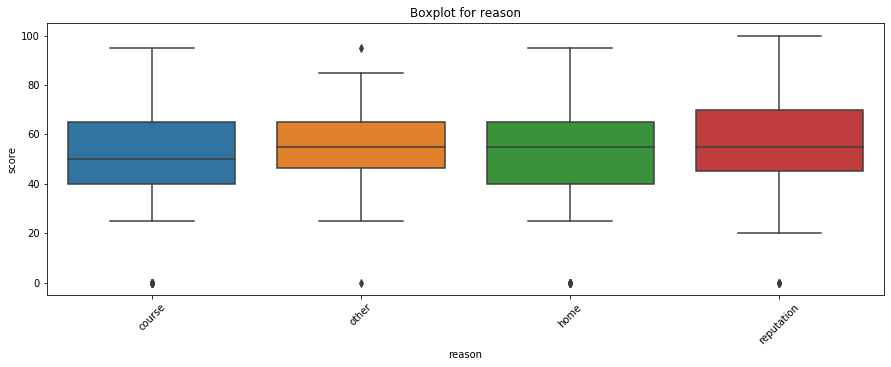

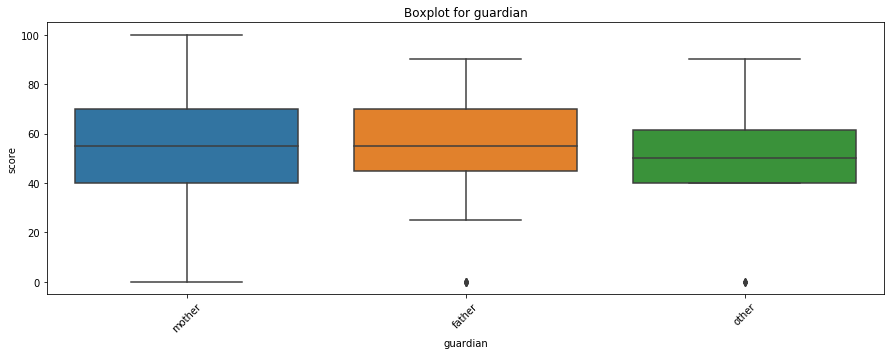

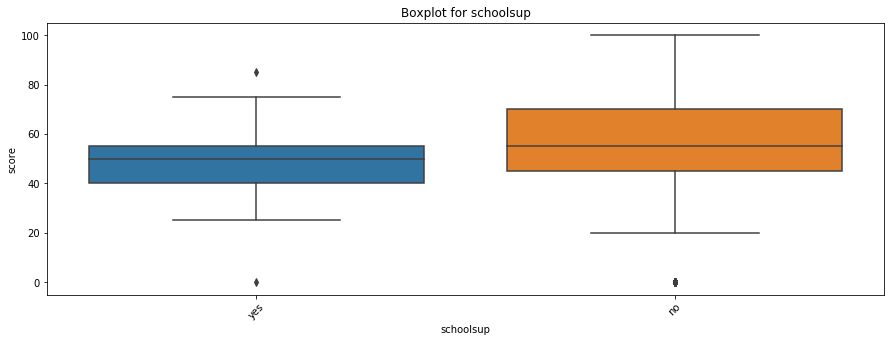

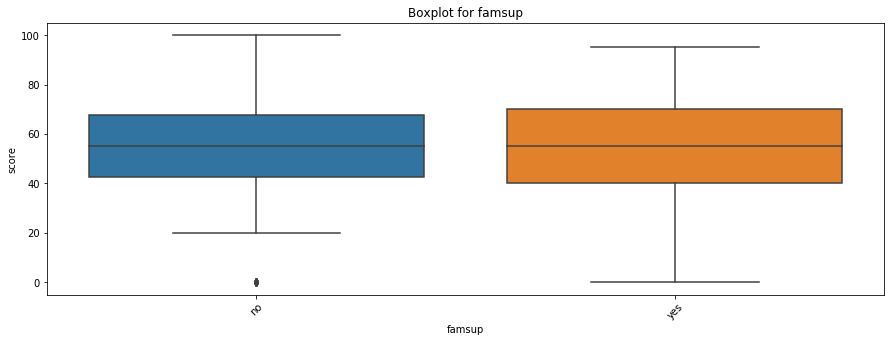

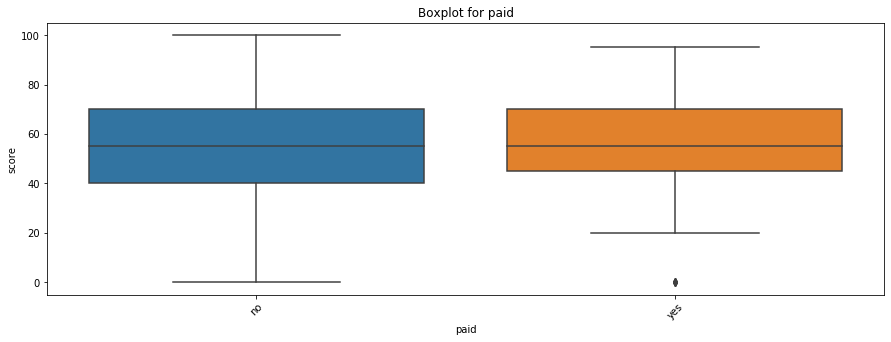

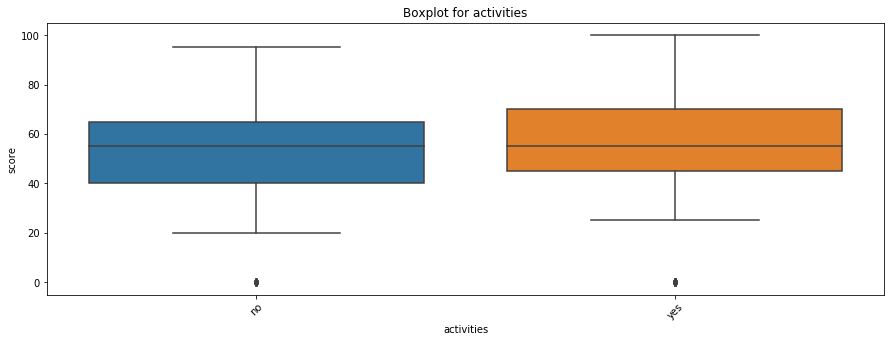

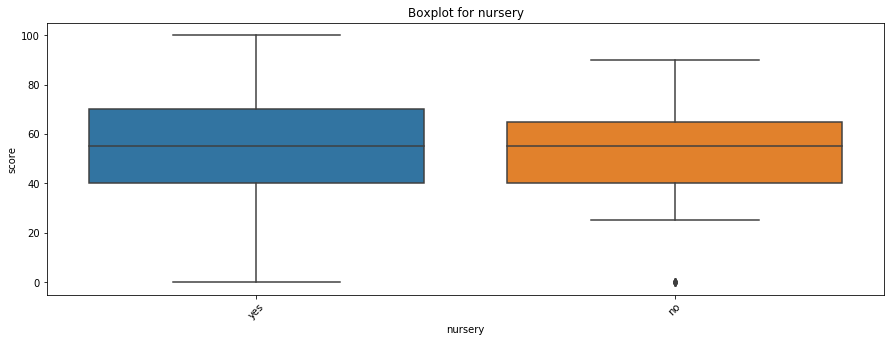

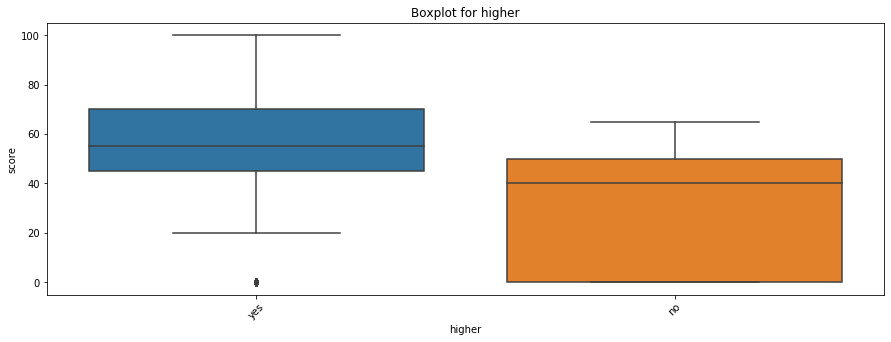

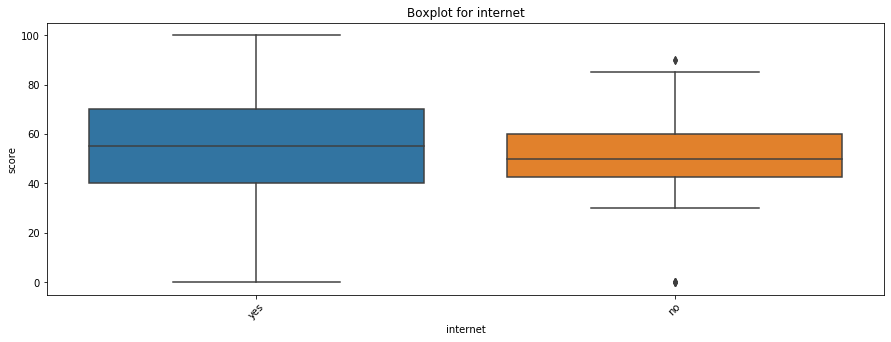

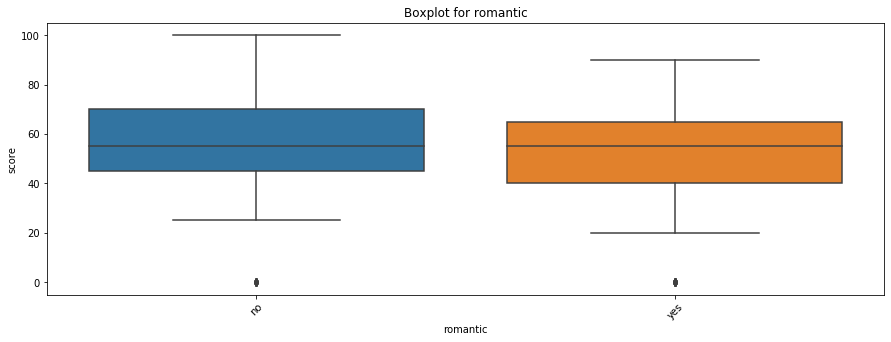

In [20]:
for col in stud.columns:
     if pd.api.types.is_number(stud[col].dropna().to_list()[0]) == False:
            get_boxplot(col)

Исходя из представленных графиков, можно сделать вывод, что переменные

[school, sex, famsize, Pstatus, famsup, paid, activities, nursery]

не влияют на предсказание величины [score]

Но также нужно проверить есть ли разница в распределении оценок по номинативным признакам, обращаясь к тесту Стьюдента. Нужно проверить нулевую гипотезу о том, что распределение итогового балла по различным параметрам неразличимы:

In [21]:
for col in stud.columns:
    if pd.api.types.is_number(stud[col].dropna().to_list()[0]) == False:
        get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Cерьёзно отличаeтся только 4 параметра ['Mjob', 'address', 'higher', 'romantic']. Нужно оставить эти переменные для дальнейшего построения модели.

Таким образом из всего проделанного можно сделать вывод, что для дальнейшего построения подели нам понадобятся переменные, которые, возможно, влияют на наш итоговый балл, а именно:

['Medu', 'Fedu', 'studytime', 'absences', 'famrel', 'freetime', 'Mjob', 'address', 'higher', 'romantic']

In [22]:
stud_for_model = stud.loc[:, ['Medu', 
                              'Fedu', 
                              'studytime', 
                              'absences', 
                              'famrel', 
                              'freetime', 
                              'Mjob', 
                              'address', 
                              'higher', 
                              'romantic']]
stud_for_model.head()

,Medu,Fedu,studytime,absences,famrel,freetime,Mjob,address,higher,romantic
0,4.0,4.0,2.0,6.0,4.0,3.0,at_home,U,yes,no
1,1.0,1.0,2.0,4.0,5.0,3.0,at_home,U,yes,no
2,1.0,1.0,2.0,10.0,4.0,3.0,at_home,U,yes,NaN
3,4.0,2.0,3.0,2.0,3.0,2.0,health,U,yes,yes
4,3.0,3.0,2.0,4.0,4.0,3.0,other,U,yes,no


Выводы

В результате EDA для анализа влияния немалого количества факторов на оценку экзамена по математике были получены следующие выводы:
1) В данных немалое количесво пустых значений.

2) Данные не являются прозрачными, так как сущечтвовали выбросы.

3) Положительная карреляция, но не сильная, параметров [Medu, Fedu, studytime], может говорить о    том, что на предсказание балла по математике могут влиять оба родителей и время на учёбу          помимо школы. Но из-за их слабой скоррелированности можно также сказать, что балл может быть      завышенным.

4) Наиболее важными параметрами для дальнейщего постоения модели является:

['Medu','Fedu', 'studytime','absences', 'famrel','freetime', 'Mjob', 'address','higher','romantic']